# Peak width vs mass

In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb16/FID_T2+_gly_mass")

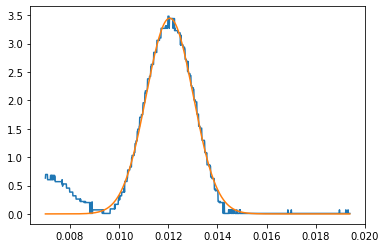

In [149]:
FIDData = pd.read_csv(rel_path / ("0_66.csv"), header = None)
chan1 = set_zero(FIDData[1].values)
chan2 = set_zero(FIDData[2].values)
tm = trans_mag(chan1, chan2)
tlist = FIDData[0].values

xlist, data = isolate_echo(tlist,tm)
popt, pcov = curve_fit(echo_gaussian, xlist, data, p0 =[6, 6.0e-03, 9.5e-04])


plt.plot(xlist, data)
plt.plot(xlist, echo_gaussian(xlist,*popt))

In [140]:
popt

array([ 2.88614673e+01, -9.00618055e-03,  6.43975503e-03])

In [150]:
def pulse_time(data, num = 0):
    threshhold = 1
    dist = 50
    arr = np.where([d > threshhold for d in np.diff(data)])[0]
    where = []
    where.append(arr[0])
    for i in range(1,len(arr)-1):
        if np.abs(arr[i]-arr[i-1]) > dist:
            where.append(arr[i])
    return where[num]

def set_zero(data):
    adjust = 50
    cutoff = pulse_time(data)-adjust
    zero = np.mean(data[:cutoff])
    return np.subtract(data, zero)

def trans_mag(chan1, chan2):
    return np.sqrt(np.square(chan1)+np.square(chan2))

def isolate_FID(tlist, data):
    padleft = 50
    padright = 50
    data_adj = data[pulse_time(data)+padleft:pulse_time(data,1)-padright]
    time_adj = tlist[pulse_time(data)+padleft:pulse_time(data,1)-padright]
    return time_adj, data_adj

def isolate_echo(tlist, data):
    padleft = 100
    data_adj = data[pulse_time(data,1)+padleft:]
    time_adj = tlist[pulse_time(data,1) + padleft:]
    return time_adj, data_adj

def echo_gaussian(x, A, tau, T2):
    return A*np.exp(-(x-2*tau)**2/(2*T2**2)-x/.013)

def FID_gaussian(x, A, T2):
    return A*np.exp(-(x)**2/(2*T2**2))

def inv(x, A, b):
    return A/(x-b)

def residuals(data, theory):
    return np.sqrt(np.sum([(d-t)**2/d for d,t in zip(data,theory)]))/len(data)

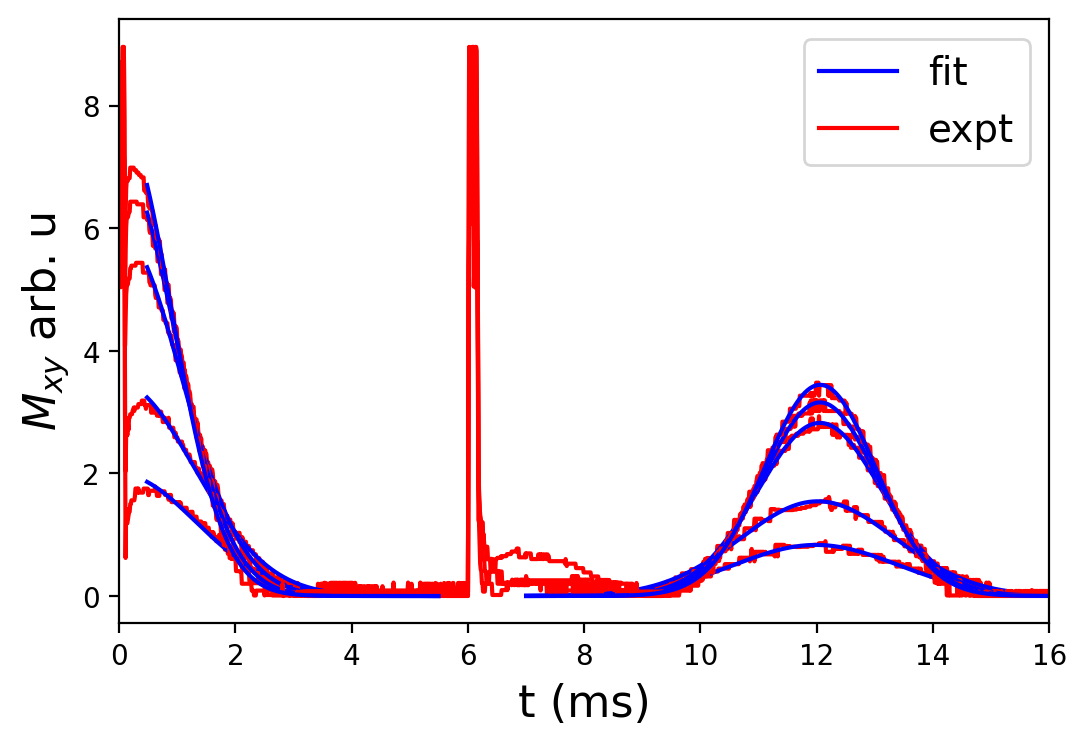

In [171]:
mass_list = [14,26,44,53,66]
T2_echos = []
T2_echos_errors = []
T2_FIDs = []
T2_FIDs_errors = []


for m in mass_list:

    FIDData = pd.read_csv(rel_path / ("0_"+str(m) + ".csv"), header = None)
    chan1 = set_zero(FIDData[1].values)
    chan2 = set_zero(FIDData[2].values)
    tm = trans_mag(chan1, chan2)
    tlist = FIDData[0].values
    echo_start = 0
    echo_end = 2300
    fid_start = 0
    fid_end = 0

    aggregate_data = [None]*len(tlist)
    
    xlist, data = isolate_echo(tlist,tm)
    popt, pcov = curve_fit(echo_gaussian, xlist, data, p0 =[3.4, 6.0e-03, 9.5e-04])
   
    echo_start = np.where([t == xlist[0] for t in tlist])[0][0]
    
    for i,x in enumerate(xlist):, "fitted region"
    T2_FIDs_errors.append(pcov[1][1]) 


    for i,x in enumerate(xlist):
        aggregate_data[np.where([t == x for t in tlist])[0][0]]  = FID_gaussian(x, *popt)
        fid_end = np.where([t == x for t in tlist])[0][0]

    start = 500
    end = 2200
    tlist_rescaled = np.multiply(tlist[start:end], 1000)
    ln2, = plt.plot(tlist_rescaled, tm[start:end], color = 'r')
    ln1, = plt.plot(tlist_rescaled, aggregate_data[start:end], color = 'b')

plt.xlabel("t (ms)", fontsize = 16)
plt.ylabel(r"$M_{xy}$ arb. u", fontsize = 16)
plt.legend([ln1, ln2],["fit", "expt"], fontsize = 14)
plt.xlim([0,16])
plt.gcf().set_dpi(200), "fitted region"

In [152]:
echo_end

2499

In [172]:
from sklearn.metrics import r2_score

In [190]:
r2_score([.001/inv(x,*popt) for x in mass_list],(np.divide(.001,T2_echos)+np.divide(.001,T2_FIDs))/2)


0.9720561864296771

[-5.3623126138771655e-08,
 -5.2332120833081005e-08,
 -5.1041115527390335e-08,
 -4.975011022169967e-08,
 -4.8459104916009015e-08,
 -4.716809961031835e-08,
 -4.5877094304627695e-08,
 -4.4586088998937025e-08,
 -4.329508369324638e-08,
 -4.200407838755572e-08,
 -4.0713073081865055e-08,
 -3.9422067776174385e-08,
 -3.813106247048374e-08,
 -3.684005716479307e-08,
 -3.554905185910241e-08,
 -3.4258046553411745e-08,
 -3.296704124772108e-08,
 -3.167603594203043e-08,
 -3.038503063633977e-08,
 -2.9094025330649102e-08,
 -2.7803020024958442e-08,
 -2.651201471926779e-08,
 -2.522100941357713e-08,
 -2.3930004107886462e-08,
 -2.26389988021958e-08,
 -2.134799349650515e-08,
 -2.0056988190814485e-08,
 -1.876598288512382e-08,
 -1.7474977579433155e-08,
 -1.6183972273742505e-08,
 -1.4892966968051842e-08,
 -1.3601961662361179e-08,
 -1.2310956356670514e-08,
 -1.1019951050979864e-08,
 -9.7289457452892e-09,
 -8.437940439598537e-09,
 -7.146935133907873e-09,
 -5.855929828217223e-09,
 -4.564924522526559e-09,
 -3.27391

In [178]:
aggregate_data

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [179]:
T2_echos_errors

[1.2437891919365667e-05,
 5.104513212128929e-06,
 3.0022530896987793e-06,
 3.454953618912542e-06,
 5.655770772098958e-06]

In [180]:
T2_FIDs_errors

[8.659792283075498e-11,
 2.0659633515454824e-11,
 6.175999553420132e-12,
 4.409390966233572e-12,
 4.71247730066193e-12]

In [181]:
T2_FIDs_errors[0] = 0

In [182]:
T2_FIDs

[0.0013254971353642967,
 0.0012860224314824092,
 0.001063990673017589,
 0.0009587994886779446,
 0.0008953594559403024]

In [183]:
popt, pcov = curve_fit(inv, np.multiply(1,mass_list), (np.array(T2_FIDs)+np.array(T2_echos))/2, sigma = np.abs((np.array(T2_FIDs)-np.array(T2_echos))))

In [184]:
np.mean(np.divide(np.abs(np.array(T2_FIDs)-np.array(T2_echos)),(np.array(T2_FIDs)+np.array(T2_echos))/2))

0.04388093408738837

In [185]:
T2_FIDs

[0.0013254971353642967,
 0.0012860224314824092,
 0.001063990673017589,
 0.0009587994886779446,
 0.0008953594559403024]

In [186]:
echo_errs =[1/t**2*e for t, e in zip(T2_echos, T2_echos_errors)]
FID_errs =[1/t**2*e for t, e in zip(T2_FIDs, T2_FIDs_errors)]

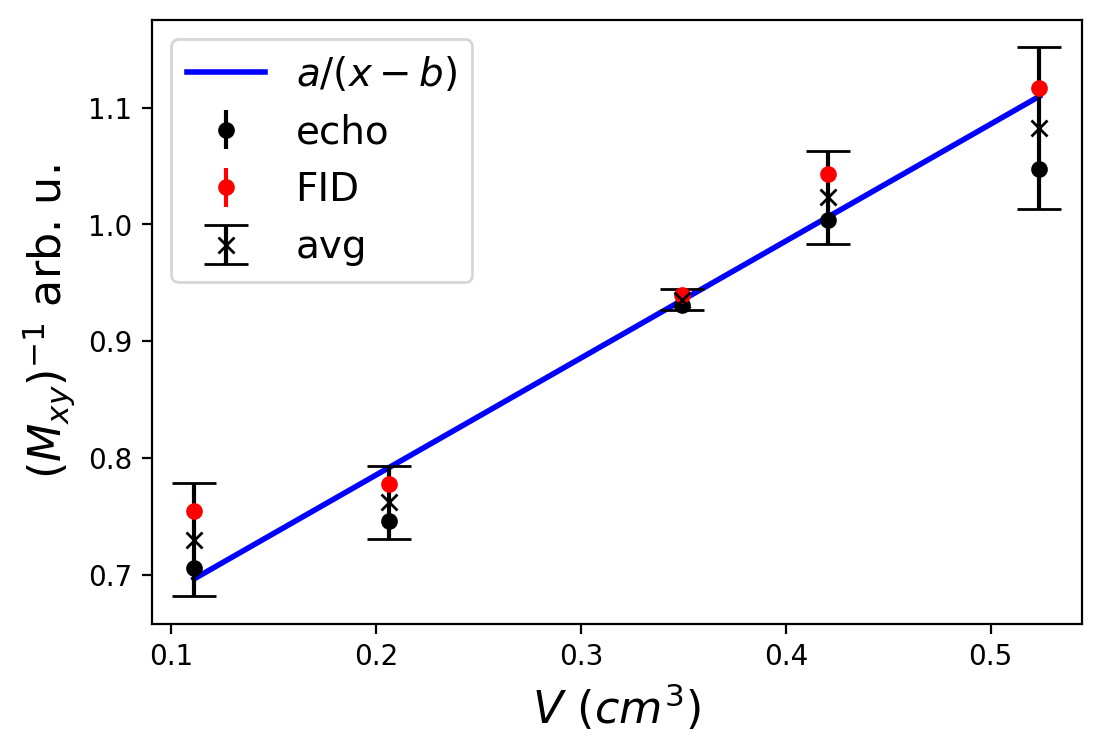

In [187]:
xlist = np.linspace(min(mass_list), max(mass_list))
plt.plot(np.divide(xlist,100*1.26), [.001/inv(x,*popt) for x in xlist], color = "b", linewidth = 2, label = r"$a/(x-b)$")
plt.errorbar(np.divide(mass_list,100*1.26), np.divide(.001,T2_echos), yerr = [err*.001 for err in echo_errs], color = "k", marker = ".", markersize = 10, linestyle = "None", label = "echo")
plt.errorbar(np.divide(mass_list,100*1.26), np.divide(.001,T2_FIDs), yerr = [err for err in FID_errs], color = "r", marker = ".", markersize = 10, linestyle = "None", label = "FID")
plt.errorbar(np.divide(mass_list, 100*1.26),(np.divide(.001,T2_echos)+np.divide(.001,T2_FIDs))/2, yerr = np.abs((np.divide(.001,T2_echos)-np.divide(.001,T2_FIDs))), label = "avg", linestyle = "None", marker = "x", color = "black",capsize = 8)
plt.xlabel(r"$V \ (cm^3)$", fontsize = 16)
plt.ylabel(r"$(M_{xy})^{-1}$ arb. u.", fontsize = 16)
plt.legend(fontsize = 14)
plt.gcf().set_dpi(200)
#Multiple axes
#Error bars are estimated...
#Always say in the caption about the error barsmeasurements

In [24]:
from scipy.optimize import curve_fit

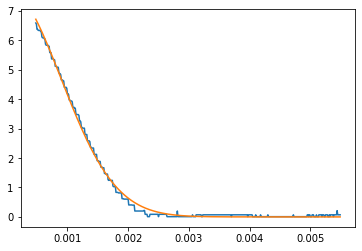

In [25]:
FIDData = pd.read_csv(rel_path / "0_66.csv", header = None)
chan1 = set_zero(FIDData[1].values)
chan2 = set_zero(FIDData[2].values)
tm = trans_mag(chan1, chan2)
tlist = FIDData[0].values

xlist, data = isolate_FID(tlist, tm)
popt, pcov = curve_fit(FID_gaussian, xlist, data, p0=[7,1/960])
plt.plot(xlist,data)
plt.plot(xlist,[FID_gaussian(x, *popt) for x in xlist])

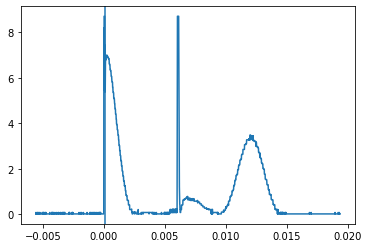

In [26]:
tm = trans_mag(chan1, chan2)

plt.plot(tlist, tm)
plt.axvline(tlist[pulse_time(chan1)])

In [27]:
def fit_echo(fname, avg_start, avg_stop, guess = [4, .02,.0008, .5]):
    FIDData = pd.read_csv(rel_path / fname, header = None)

    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    plt.plot(tlist, chan1)
    plt.plot(tlist, chan2)

    avg_window = slice(avg_start, avg_stop)

    plt.axvspan(min(tlist[avg_window]), max(tlist[avg_window]), color = "tab:red", alpha = .5)

    plt.show()

    chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
    chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

    trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))
    stdev = max(trans_mag[avg_window]) - min(trans_mag[avg_window])

    def gaussian_fit(t, A, mu, T2, c):
        return A*np.exp(-(t-mu)**2/(2*T2**2)-t/c)

    popt, pcov = curve_fit(gaussian_fit, tlist, trans_mag, p0 = guess, sigma = [stdev for y in tlist])

    plt.plot(tlist,trans_mag, color = "r", alpha = .5, label = "Data")
    plt.plot(tlist, [gaussian_fit(t, *popt) for t in tlist], label = r"$e^{-(t-2\tau)^2/(2T_2^\ast)^2}$", color = "b")
    plt.xlabel(r"$t$ (s)", fontsize = 16)
    plt.ylabel(r"$M_{xy}$ (V)", fontsize = 16)
    plt.gcf().set_dpi(200)
    plt.legend()
    plt.show()
    print(pcov[2])
    return popt[2], np.sqrt(pcov[2][2])

In [28]:
T2s = []
errs = []

In [29]:
T2, err = fit_echo("0_29.csv", 0, 400)
T2s.append(T2)
errs.append(err)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ben/Documents/Repos/382L_NMRLab/data/Feb16/FID_T2+_gly_mass/0_29.csv'

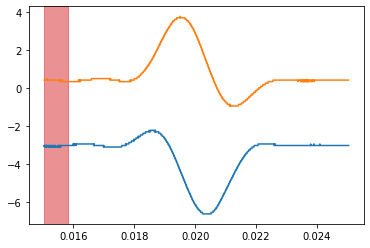

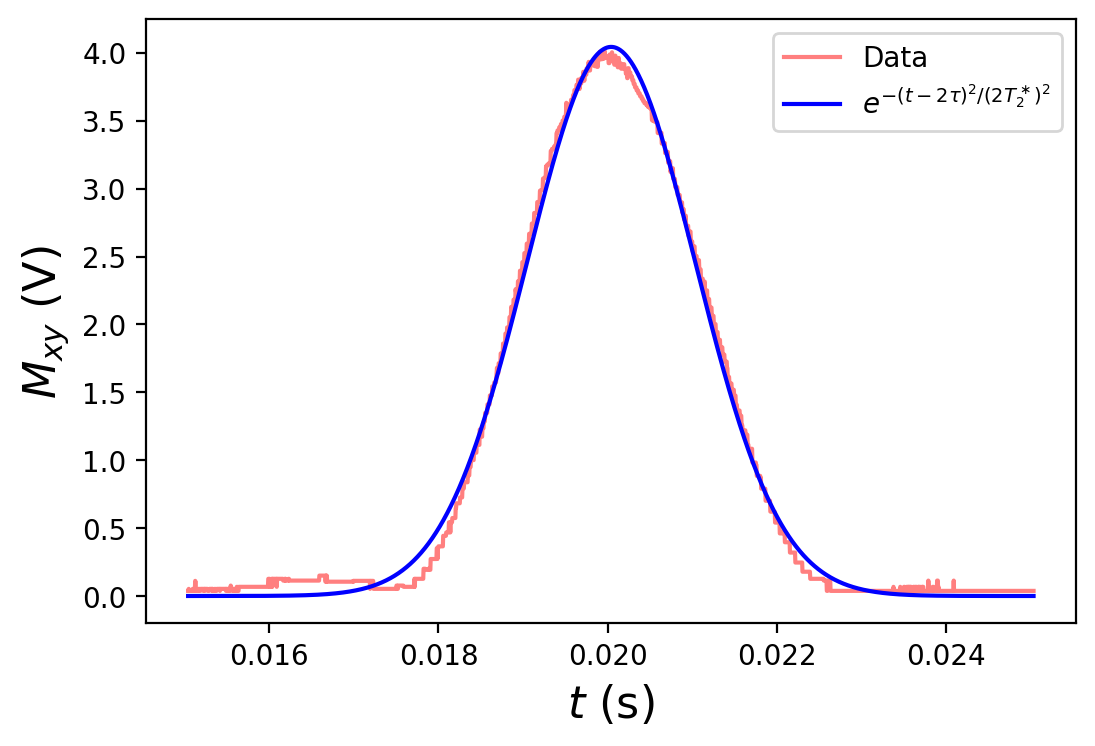

[-6.24873391e-04 -7.50426956e-09  1.75543091e-12  7.11816652e-03]


In [ ]:
T2, err = fit_echo("0_57.csv", 0, 200)

T2s.append(T2)
errs.append(err)

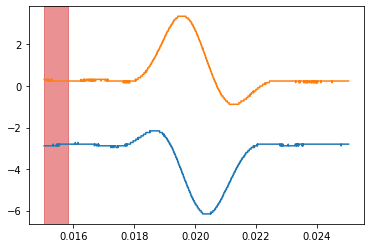

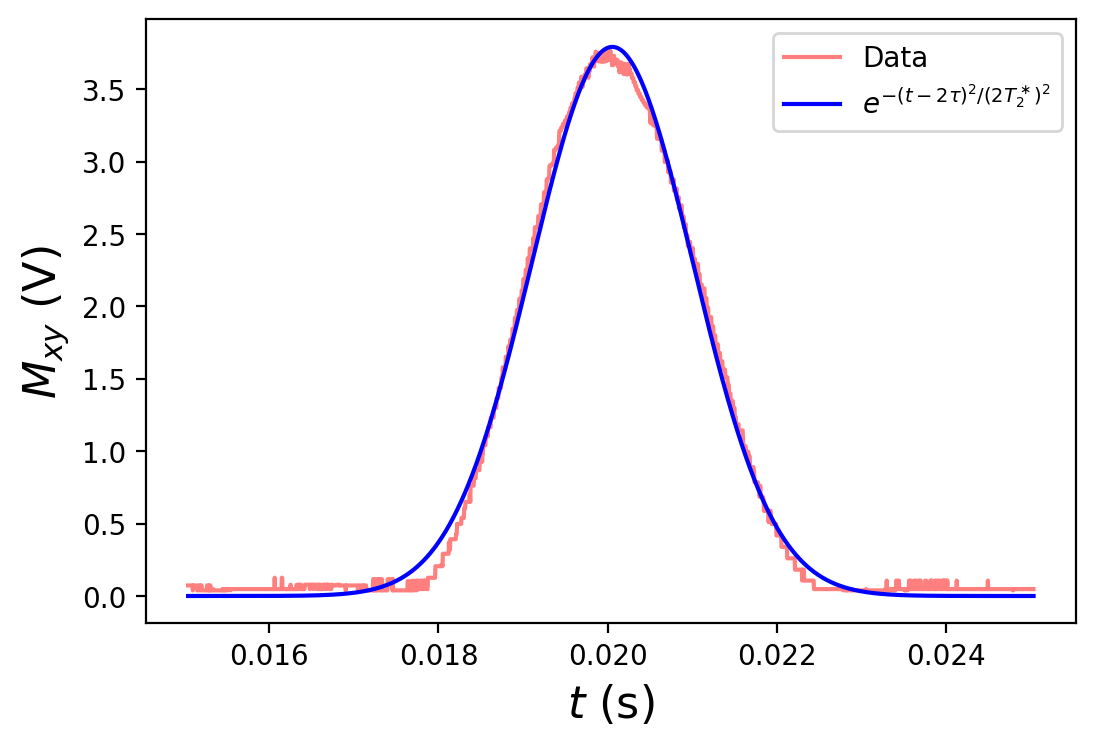

[-2.21720827e-03 -2.52188934e-08  1.66121798e-12  4.64062622e-03]


In [ ]:
T2, err = fit_echo("0_83.csv", 0, 200)

T2s.append(T2)
errs.append(err)

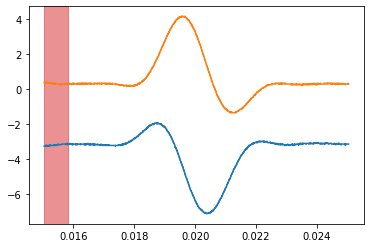

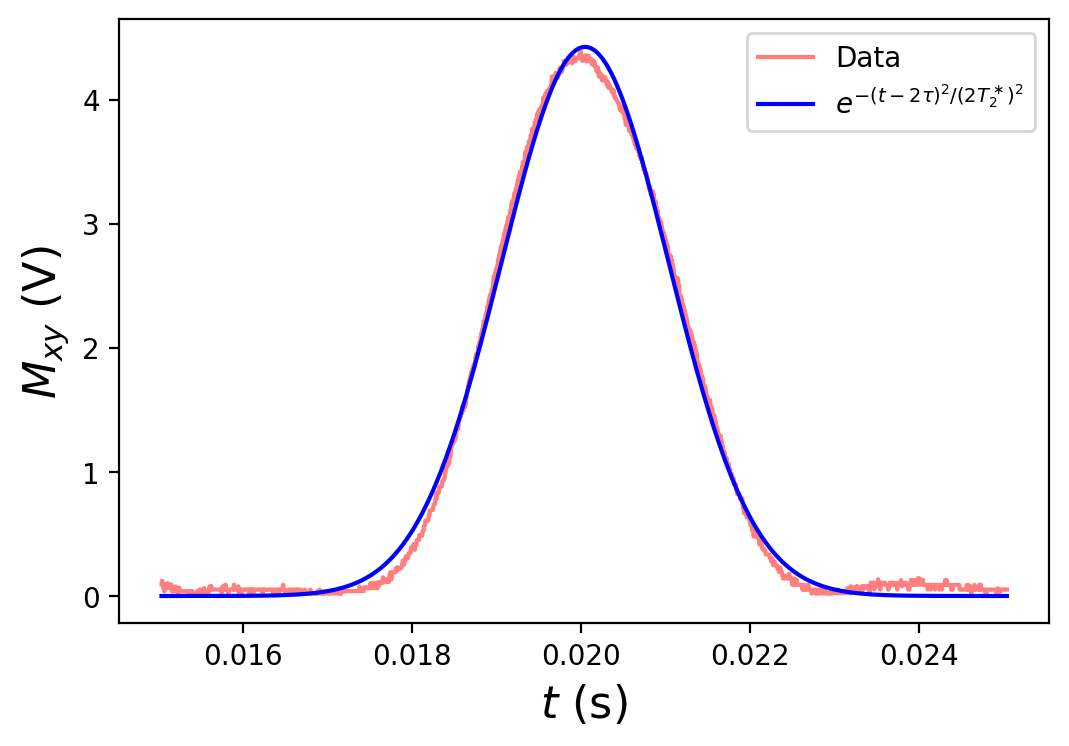

[ 3.14047411e-04  3.42572122e-09  1.51971064e-12 -9.75471514e-03]


In [ ]:
T2, err = fit_echo("1_01.csv", 0, 200)
T2s.append(T2)
errs.append(err)

In [ ]:
T2, err = fit_echo("1_27.csv", 2100, -1)

T2s.append(T2)
errs.append(err)

NameError: name 'fit_echo' is not defined

In [ ]:
T2s

[0.0012443971952640295,
 0.0012443971952640295,
 0.0009967888318538087,
 0.0009532641790058274,
 0.0009898978068912819,
 0.0009496515658209635]

In [ ]:
def invfit(x, a, b):
    return a/x+b

In [ ]:
popt, pcov = curve_fit(invfit,[.29, .57, .83, 1.01, 1.27], T2s, p0 = [.0003, .0008])

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [ ]:
(T2s[-1]-T2s[0])/(1.27-.29)

-0.0003007611880466329

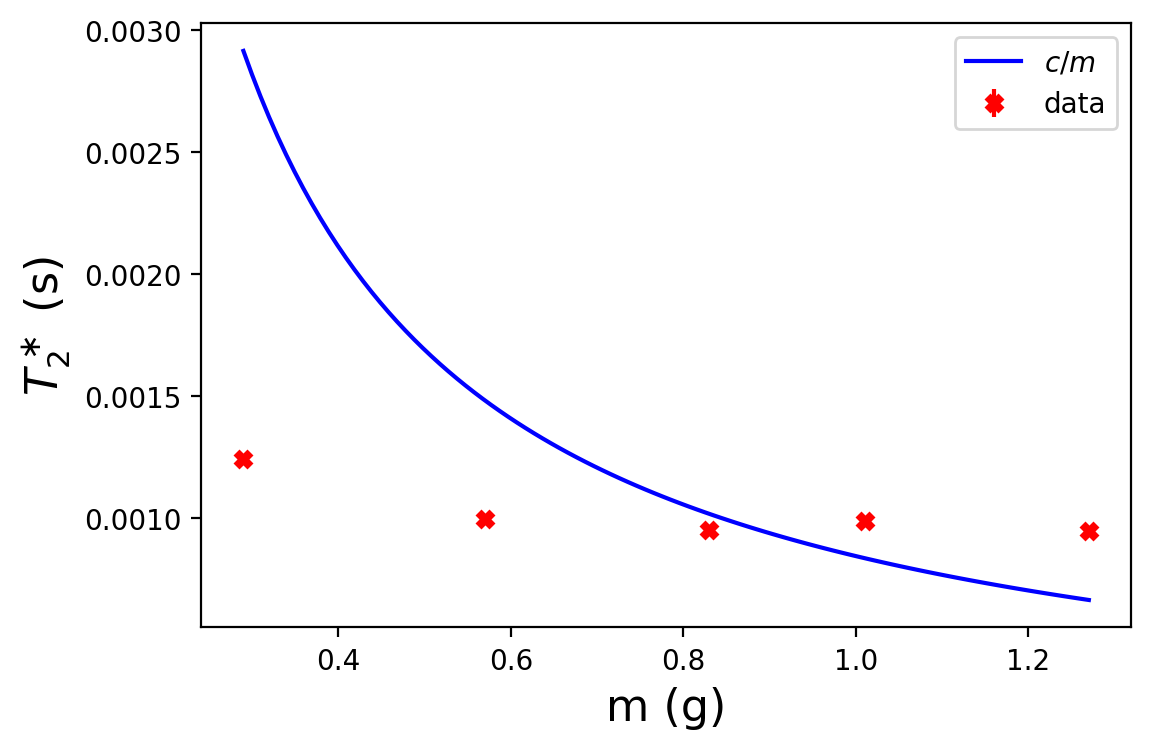

In [ ]:
plt.errorbar([.29,.57,.83,1.01,1.27], T2s, yerr = errs, linestyle = "None", color = "r", marker = "X", label = "data")
xlist = np.linspace(.29,1.27, 100)
#plt.plot(xlist, [invfit(x, *popt) for x in xlist], label = r"$c/m + b$")
plt.plot(xlist, [invfit(x, popt[1],0) for x in xlist], label = r"$c/m$", color = "b")
plt.xlabel("m (g)", fontsize = 16)
plt.ylabel(r"$T_2^\ast$ (s)", fontsize = 16)
plt.legend()
plt.gcf().set_dpi(200)

In [ ]:
T2s

[0.0012443972325110809,
 0.000996790262252001,
 0.0009532639754333467,
 0.0009898987816005002,
 0.0009496512682253806]

In [ ]:
FID_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 09/glycerin_FID")

T2s_FID = []

In [ ]:
data = pd.read_csv(FID_path / "1_27.csv", header = None)

thresh = 1
chan_1_cut = np.argwhere([a > thresh for a in np.diff(data[1].values)])[0][0]
chan_2_cut = np.argwhere([a > thresh for a in np.diff(data[1].values)])[0][0]
ad_chan1 = np.mean(data[1].values[:chan_1_cut-50])
ad_chan2 = np.mean(data[2].values[:chan_2_cut-50])

tlist = data[0].values
chan1 = data[1].values - ad_chan1
chan2 = data[2].values - ad_chan2

trans_mag = np.sqrt(np.square(chan1)+np.square(chan2))[max([chan_1_cut, chan_2_cut])+100:]
tlist = tlist[max([chan_1_cut, chan_2_cut])+100:]

In [ ]:
popt, pcov = curve_fit(FID_fit, tlist, trans_mag, p0 = [6, 1/1000])

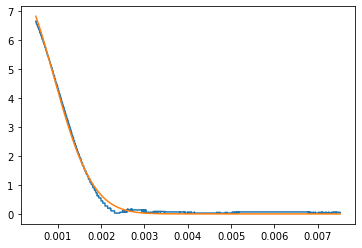

In [ ]:
plt.plot(tlist, trans_mag)
plt.plot(tlist, [FID_fit(t,*popt) for t in tlist])

In [ ]:
T2s_FID.append(popt[1])

In [ ]:
def FID_fit(t, A, T2):
        return A*np.exp(-(t)**2/(2*T2**2))

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

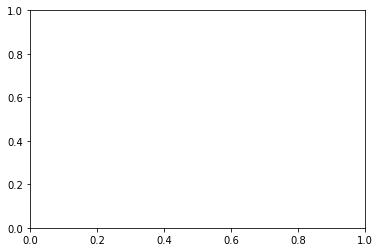

In [ ]:
plt.plot(T2s, T2s_FID, marker = "x")